In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('train.csv')

In [3]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
df.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

<AxesSubplot:>

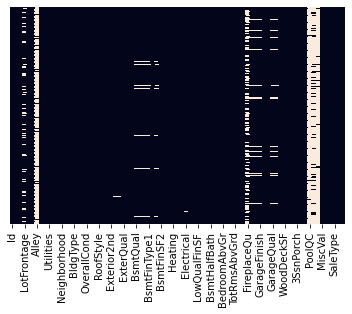

In [5]:
sns.heatmap(df.isnull(), yticklabels=False, cbar=False)

In [6]:
df.shape

(1460, 81)

In [7]:
## Fill Missing values

In [8]:
df['LotFrontage'] = df['LotFrontage'].fillna(df['LotFrontage'].mean())

In [9]:
df.drop(['Alley'], axis = 1, inplace = True)

In [10]:
df['BsmtCond']=df['BsmtCond'].fillna(df['BsmtCond'].mode()[0])
df['BsmtQual']=df['BsmtQual'].fillna(df['BsmtQual'].mode()[0])

In [11]:
df['FireplaceQu']=df['FireplaceQu'].fillna(df['FireplaceQu'].mode()[0])
df['GarageType']=df['GarageType'].fillna(df['GarageType'].mode()[0])

In [12]:
df.drop(['GarageYrBlt'],axis=1,inplace=True)

In [13]:
df['GarageFinish']=df['GarageFinish'].fillna(df['GarageFinish'].mode()[0])
df['GarageQual']=df['GarageQual'].fillna(df['GarageQual'].mode()[0])
df['GarageCond']=df['GarageCond'].fillna(df['GarageCond'].mode()[0])

In [14]:
df.drop(['PoolQC','Fence','MiscFeature'],axis=1,inplace=True)

In [35]:
df.shape

(1422, 75)

In [16]:
df.drop(['Id'],axis=1,inplace=True)

In [34]:
df['MSSubClass'].value_counts().sum()

1422

In [18]:
df['MasVnrType']=df['MasVnrType'].fillna(df['MasVnrType'].mode()[0])
df['MasVnrArea']=df['MasVnrArea'].fillna(df['MasVnrArea'].mode()[0])

<AxesSubplot:>

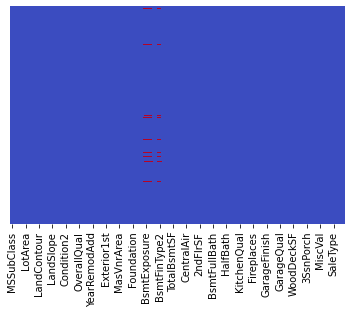

In [19]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='coolwarm')

In [20]:
df['BsmtExposure']=df['BsmtExposure'].fillna(df['BsmtExposure'].mode()[0])

<AxesSubplot:>

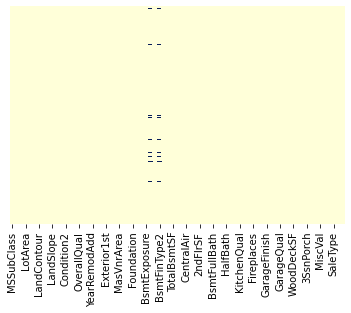

In [21]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='YlGnBu')

In [22]:
df['BsmtFinType2']=df['BsmtFinType2'].fillna(df['BsmtFinType2'].mode()[0])

In [23]:
df.dropna(inplace=True)

In [36]:
df.shape

(1422, 75)

In [45]:
cols = df.columns
num_cols= df._get_numeric_data().columns
list(set(cols) - set(num_cols))
len(set(cols) - set(num_cols))

39

In [37]:
##Handle Categorical Features

In [27]:
columns=['MSZoning','Street','LotShape','LandContour','Utilities','LotConfig','LandSlope','Neighborhood',
         'Condition2','BldgType','Condition1','HouseStyle','SaleType',
        'SaleCondition','ExterCond',
         'ExterQual','Foundation','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2',
        'RoofStyle','RoofMatl','Exterior1st','Exterior2nd','MasVnrType','Heating','HeatingQC',
         'CentralAir',
         'Electrical','KitchenQual','Functional',
         'FireplaceQu','GarageType','GarageFinish','GarageQual','GarageCond','PavedDrive']

In [55]:
def category_onehot_multcols(multcolumns):
    df_final=final_df
    i=0
    for fields in multcolumns:
        
        print(fields)
        df1=pd.get_dummies(final_df[fields],drop_first=True)
        
        final_df.drop([fields],axis=1,inplace=True)
        if i==0:
            df_final=df1.copy()
        else:
            
            df_final=pd.concat([df_final,df1],axis=1)
        i=i+1
       
        
    df_final=pd.concat([final_df,df_final],axis=1)
        
    return df_final

In [56]:
main_df=df.copy()
main_df.shape

(1422, 75)

In [47]:
## Combine Test Data 

test_df=pd.read_csv('formulatedtest.csv')

In [48]:
test_df.shape

(1459, 74)

In [50]:
test_df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,20,RH,80.0,11622,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,120,0,0,6,2010,WD,Normal
1,20,RL,81.0,14267,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,36,0,0,0,0,12500,6,2010,WD,Normal
2,60,RL,74.0,13830,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,34,0,0,0,0,0,3,2010,WD,Normal
3,60,RL,78.0,9978,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,36,0,0,0,0,0,6,2010,WD,Normal
4,120,RL,43.0,5005,Pave,IR1,HLS,AllPub,Inside,Gtl,...,82,0,0,144,0,0,1,2010,WD,Normal


In [51]:
final_df=pd.concat([df,test_df],axis=0)

In [52]:
final_df['SalePrice']

0       208500.0
1       181500.0
2       223500.0
3       140000.0
4       250000.0
          ...   
1454         NaN
1455         NaN
1456         NaN
1457         NaN
1458         NaN
Name: SalePrice, Length: 2881, dtype: float64

In [53]:
final_df.shape

(2881, 75)

In [57]:
final_df=category_onehot_multcols(columns)

MSZoning
Street
LotShape
LandContour
Utilities
LotConfig
LandSlope
Neighborhood
Condition2
BldgType
Condition1
HouseStyle
SaleType
SaleCondition
ExterCond
ExterQual
Foundation
BsmtQual
BsmtCond
BsmtExposure
BsmtFinType1
BsmtFinType2
RoofStyle
RoofMatl
Exterior1st
Exterior2nd
MasVnrType
Heating
HeatingQC
CentralAir
Electrical
KitchenQual
Functional
FireplaceQu
GarageType
GarageFinish
GarageQual
GarageCond
PavedDrive


In [58]:
final_df.shape

(2881, 235)

In [59]:
final_df =final_df.loc[:,~final_df.columns.duplicated()]

In [60]:
final_df.shape

(2881, 175)

In [61]:
final_df

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,Min1,Min2,Typ,Attchd,Basment,BuiltIn,CarPort,Detchd,RFn,P
0,60,65.0,8450,7,5,2003,2003,196.0,706.0,0.0,...,0,0,1,1,0,0,0,0,1,0
1,20,80.0,9600,6,8,1976,1976,0.0,978.0,0.0,...,0,0,1,1,0,0,0,0,1,0
2,60,68.0,11250,7,5,2001,2002,162.0,486.0,0.0,...,0,0,1,1,0,0,0,0,1,0
3,70,60.0,9550,7,5,1915,1970,0.0,216.0,0.0,...,0,0,1,0,0,0,0,1,0,0
4,60,84.0,14260,8,5,2000,2000,350.0,655.0,0.0,...,0,0,1,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,160,21.0,1936,4,7,1970,1970,0.0,0.0,0.0,...,0,0,1,1,0,0,0,0,0,0
1455,160,21.0,1894,4,5,1970,1970,0.0,252.0,0.0,...,0,0,1,0,0,0,1,0,0,0
1456,20,160.0,20000,5,7,1960,1996,0.0,1224.0,0.0,...,0,0,1,0,0,0,0,1,0,0
1457,85,62.0,10441,5,5,1992,1992,0.0,337.0,0.0,...,0,0,1,1,0,0,0,0,0,0


In [62]:
df_Train=final_df.iloc[:1422,:]
df_Test=final_df.iloc[1422:,:]

In [63]:
df_Train.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,Min1,Min2,Typ,Attchd,Basment,BuiltIn,CarPort,Detchd,RFn,P
0,60,65.0,8450,7,5,2003,2003,196.0,706.0,0.0,...,0,0,1,1,0,0,0,0,1,0
1,20,80.0,9600,6,8,1976,1976,0.0,978.0,0.0,...,0,0,1,1,0,0,0,0,1,0
2,60,68.0,11250,7,5,2001,2002,162.0,486.0,0.0,...,0,0,1,1,0,0,0,0,1,0
3,70,60.0,9550,7,5,1915,1970,0.0,216.0,0.0,...,0,0,1,0,0,0,0,1,0,0
4,60,84.0,14260,8,5,2000,2000,350.0,655.0,0.0,...,0,0,1,1,0,0,0,0,1,0


In [64]:
df_Test.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,Min1,Min2,Typ,Attchd,Basment,BuiltIn,CarPort,Detchd,RFn,P
0,20,80.0,11622,5,6,1961,1961,0.0,468.0,144.0,...,0,0,1,1,0,0,0,0,0,0
1,20,81.0,14267,6,6,1958,1958,108.0,923.0,0.0,...,0,0,1,1,0,0,0,0,0,0
2,60,74.0,13830,5,5,1997,1998,0.0,791.0,0.0,...,0,0,1,1,0,0,0,0,0,0
3,60,78.0,9978,6,6,1998,1998,20.0,602.0,0.0,...,0,0,1,1,0,0,0,0,0,0
4,120,43.0,5005,8,5,1992,1992,0.0,263.0,0.0,...,0,0,1,1,0,0,0,0,1,0


In [65]:
df_Train.shape

(1422, 175)

In [66]:
df_Test.drop(['SalePrice'],axis=1,inplace=True)

/home/solomon/miniconda3/envs/tensorflow/lib/python3.7/site-packages/pandas/core/frame.py:4315: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [67]:
X_train=df_Train.drop(['SalePrice'],axis=1)
y_train=df_Train['SalePrice']

# Prediciton and selecting the Algorithm

In [69]:
import xgboost
classifier=xgboost.XGBRegressor()
classifier.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
       importance_type='gain', interaction_constraints='',
       learning_rate=0.300000012, max_delta_step=0, max_depth=6,
       min_child_weight=1, missing=nan, monotone_constraints='()',
       n_estimators=100, n_jobs=4, num_parallel_tree=1,
       objective='reg:squarederror', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
       validate_parameters=1, verbosity=None)

In [74]:
import xgboost
from sklearn.model_selection import RandomizedSearchCV
regressor=xgboost.XGBRegressor()

In [75]:
booster=['gbtree','gblinear']
base_score=[0.25,0.5,0.75,1]

In [76]:
## Hyper Parameter Optimization


n_estimators = [100, 500, 900, 1100, 1500]
max_depth = [2, 3, 5, 10, 15]
booster=['gbtree','gblinear']
learning_rate=[0.05,0.1,0.15,0.20]
min_child_weight=[1,2,3,4]

# Define the grid of hyperparameters to search
hyperparameter_grid = {
    'n_estimators': n_estimators,
    'max_depth':max_depth,
    'learning_rate':learning_rate,
    'min_child_weight':min_child_weight,
    'booster':booster,
    'base_score':base_score
    }

In [77]:
# Set up the random search with 4-fold cross validation
random_cv = RandomizedSearchCV(estimator=regressor,
            param_distributions=hyperparameter_grid,
            cv=5, n_iter=50,
            scoring = 'neg_mean_absolute_error',n_jobs = 4,
            verbose = 5, 
            return_train_score = True,
            random_state=42)

In [ ]:
random_cv.fit(X_train,y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  10 tasks      | elapsed: 20.2min
[Parallel(n_jobs=4)]: Done  64 tasks      | elapsed: 239.1min


In [ ]:
random_cv.best_estimator_

In [ ]:
random_cv.best_estimator_

In [ ]:
regressor= xgboost.XGBRegressor(base_score=0.25, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=2, min_child_weight=1, missing=None, n_estimators=900,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [ ]:
regressor.fit(X_train,y_train)

In [ ]:
import pickle
filename = 'finalized_model.pkl'
pickle.dump(classifier, open(filename, 'wb'))

In [ ]:
df_Test.drop(['SalePrice'],axis=1,inplace=True)

In [ ]:
df_Test.shape

In [ ]:
df_Test.head()

In [ ]:
df_Test.drop(['SalePrice'],axis=1).head()

In [ ]:
y_pred=regressor.predict(df_Test.drop(['SalePrice'],axis=1))

In [ ]:
y_pred

# Artificial Neural Network Implementation

In [ ]:
# Importing the Keras libraries and packages
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LeakyReLU,PReLU,ELU
from keras.layers import Dropout


# Initialising the ANN
classifier = Sequential()

# Adding the input layer and the first hidden layer
classifier.add(Dense(output_dim = 50, init = 'he_uniform',activation='relu',input_dim = 174))

# Adding the second hidden layer
classifier.add(Dense(output_dim = 25, init = 'he_uniform',activation='relu'))

# Adding the third hidden layer
classifier.add(Dense(output_dim = 50, init = 'he_uniform',activation='relu'))
# Adding the output layer
classifier.add(Dense(output_dim = 1, init = 'he_uniform'))

# Compiling the ANN
classifier.compile(loss=root_mean_squared_error, optimizer='Adamax')

# Fitting the ANN to the Training set
model_history=classifier.fit(X_train.values, y_train.values,validation_split=0.20, batch_size = 10, nb_epoch = 1000)

In [ ]:
ann_pred=classifier.predict(df_Test.drop(['SalePrice'],axis=1).values)

In [ ]:
from keras import backend as K
def root_mean_squared_error(y_true, y_pred):
        return K.sqrt(K.mean(K.square(y_pred - y_true)))